# EOmaps Workshop GeoPython 2024
<font size=3>Interactive geo-data analysis with EOmaps and the scientific python infrastructure.</font>

# Data Visualization

EOmaps can be used to visualize both gridded (raster) data or unsorted lists of coordinates and values.  
It provides means to render small datasets as well as millions of datapoints.

A detailed overview on how to visualize datasets is provided in the [**Data Visualization**][docs] section of the EOmaps documentation

<div style="display: inline-block">

| Steps to visualize data |  |  |
| ----------------------- | ---- | ---- |
| **1.** [Assign the data to a `Maps` object (`m`)][assign] |  | `m.set_data(...)` |
| **2.** [(**optionally**) set the plot-shape][shape] |  | `m.set_shape.< shape >(...)` |
| **3.** [(**optionally**) classify the data][classify] |  | `m.set_classify.< method >(...)` |
| **4.** [Plot the data][plot] |  | `m.plot_map(...)` |

</div>


There are many shapes suitable for all kinds of datasets and applications!  

<div class="alert alert-block alert-info"> 

**A note on speed and performance** 

The used shape can have a huge impact on the creation-time of a plot!
- Check the [shape descriptions][shape] in the docs for more details!

EOmaps can deal with integer-encoded datasets.
- No need to decode integer-encoded datasets to float prior to plotting! (see [`m.set_data`][Maps.set_data])

    
</div>


[<img src="shapes.png" width="40%"/>][shape]


[Maps]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.html
[Maps.set_data]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.set_data.html

[docs]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html

[assign]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html#assign-the-data
[shape]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html#plot-shapes
[classify]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html#classify-the-data
[plot]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html#plot-the-data

## **Example 1:** Working with gridded data

In the following we will have a look at how we can visualize some [**Copernicus Soil Water Index**][swi] data!

> [**xarray**][xarray] provides the means to read (and write) most commonly used (raster) data formats
> - NetCDF
> - HDF5
> - Zarr
> - GeoTIFF (with [rioxarray][rioxarray] extension)
> - ...  

[xarray]: https://docs.xarray.dev/en/stable/index.html
[rioxarray]: https://github.com/corteva/rioxarray
[swi]: https://land.copernicus.eu/en/products/soil-moisture/daily-soil-water-index-global-v3-0-12-5km


In [44]:
%matplotlib qt

from pathlib import Path
import xarray as xar

from eomaps import Maps
Maps.config(always_on_top=True)      # keep figures "always on top"

Open one of the NetCDF files:

In [2]:
ncfile = xar.open_dataset(next(Path("gridded_data").iterdir()))
ncfile

<xarray.Dataset> Size: 441MB
Dimensions:    (lat: 1800, lon: 3600, time: 1)
Coordinates:
  * lat        (lat) float64 14kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon        (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
  * time       (time) datetime64[ns] 8B 2023-06-01T12:00:00
Data variables: (12/18)
    crs        |S1 1B ...
    SWI_005    (time, lat, lon) float32 26MB ...
    SWI_010    (time, lat, lon) float32 26MB ...
    SWI_001    (time, lat, lon) float32 26MB ...
    SWI_015    (time, lat, lon) float32 26MB ...
    SWI_100    (time, lat, lon) float32 26MB ...
    ...         ...
    QFLAG_100  (time, lat, lon) float32 26MB ...
    QFLAG_020  (time, lat, lon) float32 26MB ...
    QFLAG_005  (time, lat, lon) float32 26MB ...
    QFLAG_001  (time, lat, lon) float32 26MB ...
    QFLAG_060  (time, lat, lon) float32 26MB ...
    SSF        (time, lat, lon) float32 26MB ...
Attributes: (12/25)
    Conventions:          CF-1.6
    archive_facility:     VITO
    copyright:            Copernicus Service information 2023
    geospatial_lat_max:   89.95
    geospatial_lat_min:   -89.95
    geospatial_lon_max:   179.95
    ...                   ...
    region_name:          GLOBE
    sensor:               ASCAT
    source:               Derived from EO microwave scatterometer observations
    time_coverage_end:    2023-06-01T12:00:00Z
    time_coverage_start:  2023-05-31T12:00:00Z
    title:                Daily Soil Water Index 0.1degree: GLOBE 2023-06-01T...

Since the data contains a 3rd dimension ("time"), we select the first entry to obtain a single layer

In [3]:
data = ncfile.isel(time=0)
data

<xarray.Dataset> Size: 441MB
Dimensions:    (lat: 1800, lon: 3600)
Coordinates:
  * lat        (lat) float64 14kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon        (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
    time       datetime64[ns] 8B 2023-06-01T12:00:00
Data variables: (12/18)
    crs        |S1 1B ...
    SWI_005    (lat, lon) float32 26MB ...
    SWI_010    (lat, lon) float32 26MB ...
    SWI_001    (lat, lon) float32 26MB ...
    SWI_015    (lat, lon) float32 26MB ...
    SWI_100    (lat, lon) float32 26MB ...
    ...         ...
    QFLAG_100  (lat, lon) float32 26MB ...
    QFLAG_020  (lat, lon) float32 26MB ...
    QFLAG_005  (lat, lon) float32 26MB ...
    QFLAG_001  (lat, lon) float32 26MB ...
    QFLAG_060  (lat, lon) float32 26MB ...
    SSF        (lat, lon) float32 26MB ...
Attributes: (12/25)
    Conventions:          CF-1.6
    archive_facility:     VITO
    copyright:            Copernicus Service information 2023
    geospatial_lat_max:   89.95
    geospatial_lat_min:   -89.95
    geospatial_lon_max:   179.95
    ...                   ...
    region_name:          GLOBE
    sensor:               ASCAT
    source:               Derived from EO microwave scatterometer observations
    time_coverage_end:    2023-06-01T12:00:00Z
    time_coverage_start:  2023-05-31T12:00:00Z
    title:                Daily Soil Water Index 0.1degree: GLOBE 2023-06-01T...

## Visualize the data

In [4]:
m = Maps(layer="all", figsize=(6, 4))
m.add_feature.preset("coastline", "ocean")

### SWI layer

In [5]:
# data.SWI_040

Create a new layer to plot the SWI

In [6]:
m_swi40 = m.new_layer("SWI 40")
m.show_layer(m_swi40.layer)

Plot the "Soil Water Index" with T=40

In [7]:
m_swi40.set_data(data, "lon", "lat", parameter="SWI_040", crs=ncfile.crs.spatial_ref)
m_swi40.set_shape.shade_raster()
m_swi40.plot_map()

Add a colorbar

In [8]:
_ = m_swi40.add_colorbar(hist_bins=100, label="Soil Water Index (T=40)")

### QFLAG layer

In [9]:
# data.QFLAG_040

Create a colormap that goes from red to transparent to overlay the QFLAG on top of the SWI values

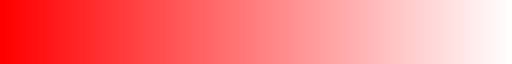

In [10]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap([(1, 0, 0, i/255) for i in range(255, 0, -1)], name="qflag cmap")
cmap

Create a new layer to plot the Quality Flag for the SWI

In [11]:
m_qflag40 = m.new_layer("QFLAG 40")
m_qflag40.set_data(data, "lon", "lat", parameter="QFLAG_040", crs=ncfile.crs.spatial_ref)
m_qflag40.set_shape.shade_raster()
m_qflag40.plot_map(vmin=0, vmax=100, cmap=cmap)

Add a colorbar but put it on a dedicated layer so it is only visible if we really want to see it.

In [12]:
cb = m_qflag40.add_colorbar(hist_kwargs=dict(log=True), layer="QFLAG 40 colorbar")

### SSF layer
Create a new layer to plot the "Surface State Flag"

In [13]:
m_ssf = m.new_layer("SSF")

In [14]:
m_ssf.set_data(data, "lon", "lat", parameter="SSF", crs=ncfile.crs.spatial_ref)
m_ssf.set_shape.shade_raster()
m_ssf.set_classify.UserDefined(bins=[0.5, 1.5, 2.5, 3.5])
m_ssf.plot_map(cmap="RdYlGn_r", vmin=0.5, vmax=3.5)

Add a colorbar but put it on a dedicated layer so it is only visible if we really want to see it.

- Since we use a classified dataset, we can use `hist_bins="bins"` to show only classification bins in the histogram
- We can use `cb.set_bin_labels` to quickly label the bins

In [15]:
cb = m_ssf.add_colorbar(hist_bins="bins", hist_kwargs=dict(log=True), layer="SSF colorbar")
cb.set_bin_labels([0.5, 1.5, 2.5, 3.5], ["unknown", "unfrozen", "frozen", "melting or surface water", "missing"])

## Attach some callbacks

- By default, callbacks only trigger on the assigned layer.  
  Setting `m.cb.pick.set_execute_on_all_layers(True)` makes the callback trigger irrespective of the visible layer!
- The `text` of an annotation can be either a static string or a callback that returns a string!
- We can fix the position of an annotation with `xytext` (and `textcoords`)

In [16]:
m_swi40.cb.pick.attach.annotate()
m_swi40.cb.pick.set_execute_on_all_layers(True)

m_ssf.cb.pick.attach.annotate(xytext=(0.03, 0.1), textcoords="axes fraction", arrowprops=None, text=lambda val, **kwargs: f"SSF={val}", layer="all")
m_ssf.cb.pick.set_execute_on_all_layers(True)

m_qflag40.cb.pick.attach.annotate(xytext=(0.03, 0.2), textcoords="axes fraction", arrowprops=None, text=lambda val, **kwargs: f"QFLAG={val}", layer="all")
m_qflag40.cb.pick.set_execute_on_all_layers(True)

In [17]:
m.show() # only required for "widget" backend

### IPython Widgets

Within **Jupyter Notebooks** we can use **[IPython Widgets][ipywidgets]** to quickly create interactive browser controls like scrollbars, buttons etc. 

[EOmaps][eomaps] provides a set of useful [pre-configured widgets][eomaps_widgets] to interact with your maps


[ipywidgets]: https://ipywidgets.readthedocs.io/en/latest/
[eomaps]: https://eomaps.readthedocs.io/
[eomaps_widgets]: https://eomaps.readthedocs.io/en/latest/notebooks/widgets.html

In [18]:
from eomaps import widgets

In [19]:
widgets.LayerOverlaySlider(m, "SSF", layout=dict(width="400px"))

LayerOverlaySlider(value=0.0, description="Overlay\n'SSF':", layout=Layout(width='400px'), max=1.0, step=0.01)

In [20]:
layout = dict(width="300px")
buttons = [
    widgets.LayerButton(m, ["SWI 40", "QFLAG 40"], description="SWI T=40 (+ red QFLAG overlay)"),
    widgets.LayerButton(m, ["QFLAG 40", "QFLAG 40 colorbar"], description="QFLAG T=40"),
    widgets.LayerButton(m, ["SSF", "SSF colorbar"], description="SSF") 
]
for b in buttons:
    b.style.button_color = 'lightblue'
    b.style.font_size = "13pt"
    b.layout.width = "400px"

display(widgets.ipywidgets.VBox(buttons))

# Dealing with encoded data

In [9]:
with xar.open_dataset(next(Path("gridded_data").iterdir()), mask_and_scale=False) as ncfile:
    encoded_data = ncfile.isel(time=0, drop=True)["SWI_001"]
encoded_data

<xarray.DataArray 'SWI_001' (lat: 1800, lon: 3600)> Size: 6MB
[6480000 values with dtype=uint8]
Coordinates:
  * lat      (lat) float64 14kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
Attributes:
    _FillValue:     255
    Class:          DATA
    grid_mapping:   crs
    long_name:      Soil Water Index with T=1
    missing_value:  255
    scale_factor:   0.5
    units:          %
    valid_range:    [  0 200]

In [10]:
m = Maps()
m.set_data(encoded_data, "lon", "lat", encoding=encoded_data.attrs, crs=4326)
m.set_shape.raster()
m.plot_map()

# Quick ways to visualize data

Files can be directly plotted via the [`m.from_file`][from_file] and [`m.new_layer_from_file`][new_layer_from_file] directives:

[from_file]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.from_file.html
[new_layer_from_file]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.new_layer_from_file.html


In [11]:
filepath = next(Path("gridded_data").iterdir())

m_quick = Maps.from_file.NetCDF(filepath, parameter="SWI_001", data_crs=4326, isel=dict(time=0), shape="shade_raster", coastline=True)

# Highlighting specific areas

[`InsetMaps`][InsetMaps] can be used to quickly highlight specific areas on a map.  
You can use them just like any other [`Maps`][Maps] object!


[InsetMaps]: https://eomaps.readthedocs.io/en/latest/notebooks/inset_maps.html
[Maps]: https://eomaps.readthedocs.io/en/dev/generated/eomaps.eomaps.Maps.html


In [40]:
m = Maps.from_file.NetCDF(filepath, parameter="SWI_001", data_crs=4326, isel=dict(time=0), shape="shade_raster")

In [41]:
mi = m.new_inset_map(xy=(8, 49), radius=10)

In [42]:
layout = {
    "figsize": [6.4, 4.8],
    "0_map": [0.0125, 0.58333, 0.6, 0.39989],
    "1_inset_map": [0.44375, 0.025, 0.53743, 0.71667],
}
m.apply_layout(layout)

In [43]:
mi.inherit_data(m)
mi.add_indicator_line()
mi.plot_map()

The [CompanionWidget][companion] also has **drag-and-drop** support for commonly used datatypes (NetCDF, GeoTIFF, CSV, shapefile)!  

[companion]: https://eomaps.readthedocs.io/en/latest/api_companion_widget.html


# [$\Rightarrow$ Spatio-temporal data analysis](<03 Spatiotemporal_analysis.ipynb>)